In [17]:
%load_ext autoreload
%autoreload 2


from util import *
#from myalgorithm import algorithm
from parallel import algorithm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:

problem_file = 'STAGE1_5.json'
# problem_file = "TEST_K50_1.json"
timelimit = 60

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
     solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

Objective value from process 1: 2610.2706666666663
Objective value from process 2: 2610.2706666666663
Objective value from process 3: 2610.2706666666663
Objective value from process 4: 2605.6973333333335
Objective value from process 5: 2605.6973333333335
Objective value from process 6: 2610.2706666666663
Objective value from process 7: 2605.6973333333335
Objective value from process 8: 2610.2706666666663
Objective value from process 9: 2605.6973333333335
Objective value from process 10: 2605.6973333333335
Objective value from process 11: 2585.469666666667
Objective value from process 12: 2610.2706666666663
Objective value from process 13: 2610.2706666666663
Objective value from process 14: 2585.469666666667
Objective value from process 15: 3041.8256666666666
Objective value from process 16: 3001.1766666666667
Objective value from process 17: 3041.8256666666666
Objective value from process 18: 3041.8256666666666
Objective value from process 19: 3041.8256666666666
Objective value from pr

{'total_cost': 775640.9,
 'avg_cost': 2585.469666666667,
 'num_drivers': 100,
 'total_dist': 397947,
 'feasible': True,
 'infeasibility': None,
 'bundles': [['WALK', [17], [17]],
  ['WALK', [26], [26]],
  ['WALK', [31, 1], [31, 1]],
  ['WALK', [2, 153, 112], [2, 153, 112]],
  ['WALK', [38], [38]],
  ['WALK', [40], [40]],
  ['WALK', [41], [41]],
  ['WALK', [5], [5]],
  ['BIKE', [23, 10, 94, 108], [23, 10, 108, 94]],
  ['BIKE', [45, 33, 12, 42], [33, 12, 45, 42]],
  ['BIKE', [13, 30, 57, 167], [13, 57, 167, 30]],
  ['BIKE', [39, 46, 11], [39, 46, 11]],
  ['BIKE', [28, 67, 104, 14], [14, 104, 67, 28]],
  ['BIKE', [15, 118, 50, 123], [15, 50, 123, 118]],
  ['BIKE', [16, 55], [16, 55]],
  ['BIKE', [0, 7, 18], [0, 7, 18]],
  ['BIKE', [43, 58, 68, 110], [43, 58, 110, 68]],
  ['BIKE', [65, 21, 71], [65, 71, 21]],
  ['BIKE', [35, 24, 117, 60], [35, 117, 60, 24]],
  ['BIKE', [3, 125, 83, 145], [83, 3, 145, 125]],
  ['BIKE', [8, 4, 48, 146], [4, 8, 146, 48]],
  ['BIKE', [72, 177, 6, 93], [6, 93, 

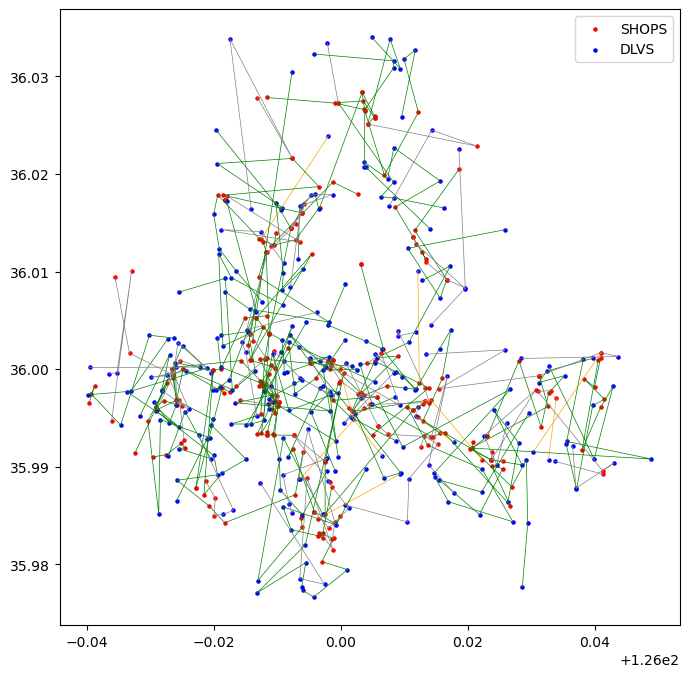

In [19]:
draw_route_solution(ALL_ORDERS, checked_solution)

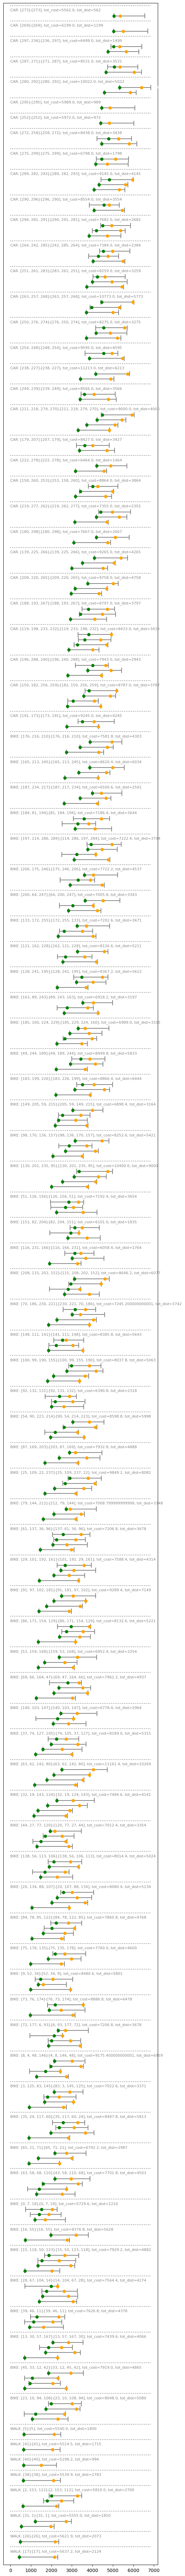

In [20]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)